# Project: Investigate a Dataset - [Data Scientist Jop Salary]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#wrangling">Data Preparation</a></li>
<li><a href="#eda">Data Exploratory</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
- First data have range of years is [2020-2021-2022].
- We will analysis this data to show some insights.
- We will choose important Raw and Columns to work on."And will answer about some question"

### Question
###### 1- Is there Relation between Salary and Experience level?
###### 2- Is there Relation between Salary VS Employment Type?
###### 3- Is there Relation between Salary VS remote_ratio (remote, hybrid, onsite)?
###### 4- What a top 10 Data Science Roles?
###### 5- What a top 10 campany-locations?
###### 6- What best type job in each company?

##### Import library to use it in project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

#### Read data

In [2]:
df= pd.read_csv("ds_salaries.csv")

#### Show head of data and tail

In [3]:
df.head(3)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


In [4]:
df.tail(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [5]:
df.shape

(607, 12)

In [6]:
df.nunique()

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [7]:
df.remote_ratio.unique()

array([  0,  50, 100], dtype=int64)

#### Prepration data to work.

- First Drop data don't need it

In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)

- Check Result

In [9]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


In [10]:
df.shape

(607, 11)

In [11]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [12]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [14]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [15]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

- Check duplected of data

In [16]:
df.duplicated().sum()

42

- Drop duplicated

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(565, 11)

In [19]:
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

In [20]:
df.shape

(565, 9)

In [21]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S


## Data Preparation

- Change some pramter 

In [22]:
df['experience_level'] = df['experience_level'].map({
    'SE': 'Senior',
    'MI': 'Mid',
    'EN': 'Entry',
    'EX': 'Executive'
})

In [23]:
df['employment_type'] = df['employment_type'].map({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

In [24]:
df['company_size'] = df['company_size'].map({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

In [25]:
df['remote_ratio'] = df['remote_ratio'].map({
    100: 'Remote',
    0: 'Onsite',
    50: 'Hybrid',
})

In [26]:
df.head(4)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,79833,DE,Onsite,DE,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,JP,Onsite,JP,Small
2,2020,Senior,Full-time,Big Data Engineer,109024,GB,Hybrid,GB,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,HN,Onsite,HN,Small


In [27]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

##### We preparated data to Exploratory

## Data Exploratory

### Salary Destribution

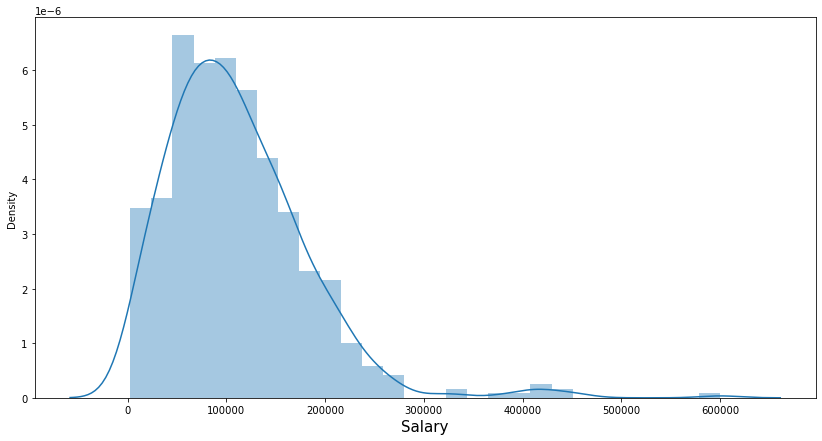

In [28]:
plt.figure(figsize=(14,7))
sns.distplot(x=df.salary_in_usd)
plt.xlabel("Salary",fontdict={'fontsize':15});

## 1- Is there Relation between Salary and Experience level?

In [29]:
df["experience_level"].value_counts()

Senior       243
Mid          208
Entry         88
Executive     26
Name: experience_level, dtype: int64

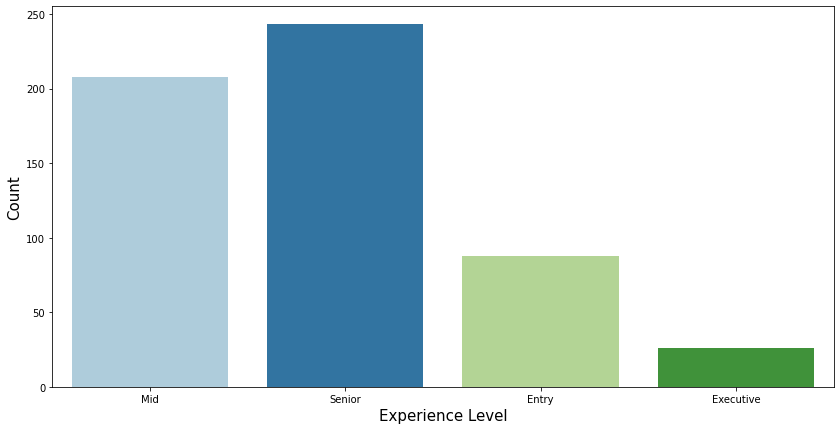

In [30]:
plt.figure(figsize=(14, 7))
sns.set_palette("Paired")
sns.countplot(df['experience_level'])
plt.xlabel("Experience Level",fontdict={'fontsize':15})
plt.ylabel("Count",fontdict={'fontsize':15});

In [31]:
MeanSalaryOfexperience_level = df.groupby('experience_level')['salary_in_usd'].mean().sort_values()

In [32]:
MeanSalaryOfexperience_level

experience_level
Entry         61643.318182
Mid           87792.995192
Senior       138374.880658
Executive    199392.038462
Name: salary_in_usd, dtype: float64

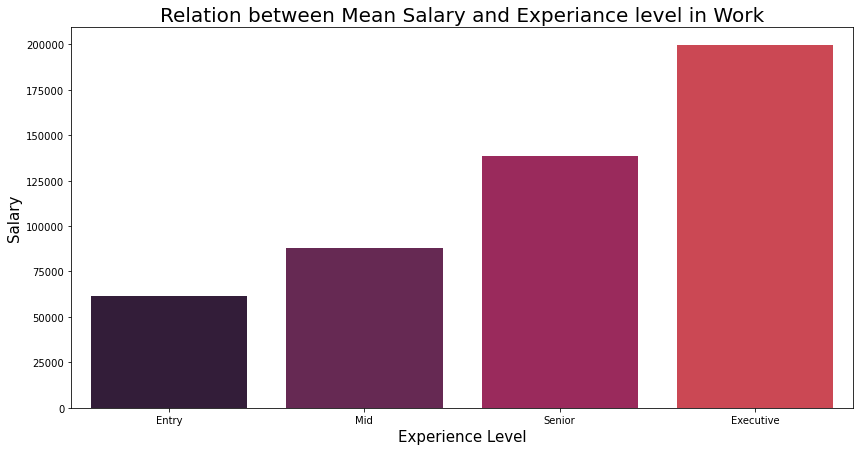

In [33]:
plt.figure(figsize=(14, 7))
sns.set_palette('rocket')
sns.barplot(x=MeanSalaryOfexperience_level.index,y=MeanSalaryOfexperience_level)
plt.ylabel("Salary",fontdict={'fontsize':15})
plt.xlabel("Experience Level",fontdict={'fontsize':15})
plt.title("Relation between Mean Salary and Experiance level in Work",fontdict={'fontsize':20});

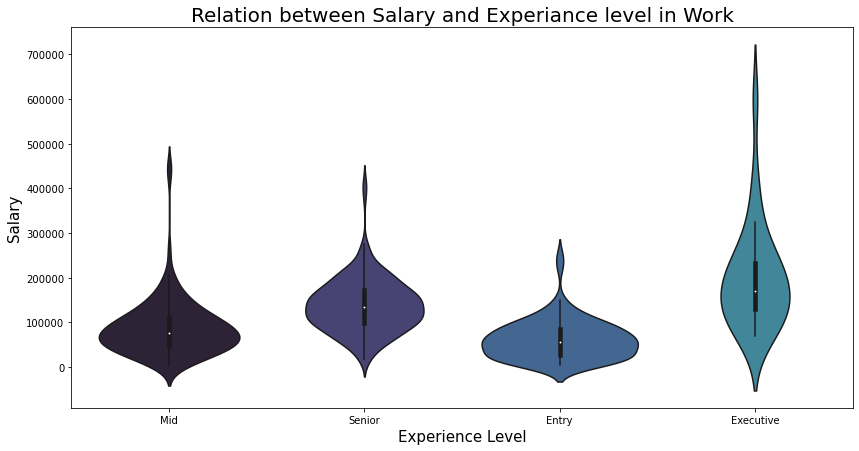

In [34]:
plt.figure(figsize=(14, 7))
sns.set_palette('mako')
sns.violinplot(x=df.experience_level,y=df.salary_in_usd)
plt.ylabel("Salary",fontdict={'fontsize':15})
plt.xlabel("Experience Level",fontdict={'fontsize':15})
plt.title("Relation between Salary and Experiance level in Work",fontdict={'fontsize':20});

- We seen Executive Level has a highest salary unlikely Entry level, that real in our life.

## 2- Is there Relation between Salary VS Employment Type?

In [35]:
MeanSalaryOfET = df.groupby('employment_type')['salary_in_usd'].mean().sort_values()

In [36]:
MeanSalaryOfET

employment_type
Part-time     33070.500000
Freelance     48000.000000
Full-time    111811.838828
Contract     184575.000000
Name: salary_in_usd, dtype: float64

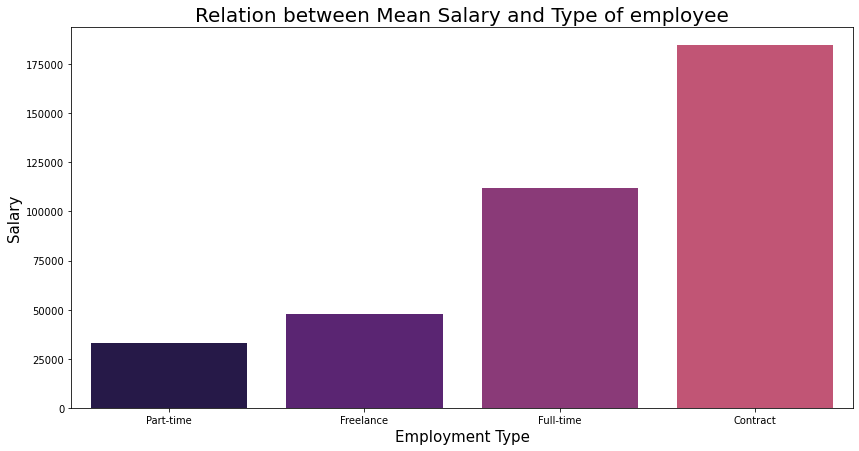

In [37]:
plt.figure(figsize=(14.,7))
sns.set_palette("magma")
sns.barplot(x=MeanSalaryOfET.index,y=MeanSalaryOfET)
plt.ylabel("Salary",fontdict={'fontsize':15})
plt.xlabel("Employment Type",fontdict={'fontsize':15})
plt.title("Relation between Mean Salary and Type of employee",fontdict={'fontsize':20});

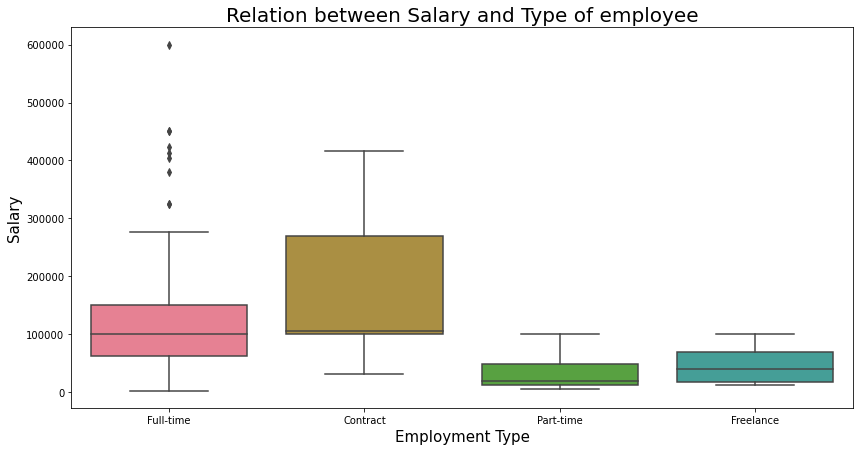

In [38]:
plt.figure(figsize=(14.,7))
sns.set_palette("husl")
sns.boxplot(x=df.employment_type,y=df.salary_in_usd)
plt.ylabel("Salary",fontdict={'fontsize':15})
plt.xlabel("Employment Type",fontdict={'fontsize':15})
plt.title("Relation between Salary and Type of employee",fontdict={'fontsize':20});

##### we see in there graph Contract have a highest mean salary but part time lowest mean salary, and we can note that too, In the second graph we have in Full time jops some salaries have a much value but mean of them lower then mean of contract, have many out layer in a full time.

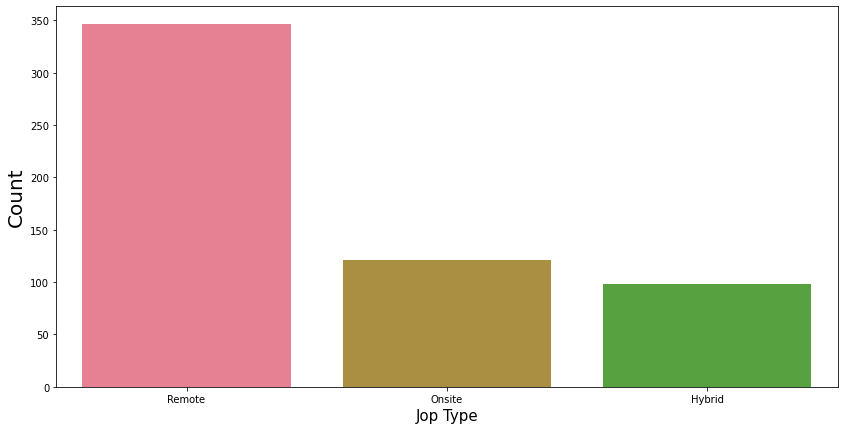

In [39]:
plt.figure(figsize=(14,7))
sns.countplot(df.remote_ratio,order=df['remote_ratio'].value_counts().index)
plt.xlabel("Jop Type",fontdict={'fontsize':15})
plt.ylabel('Count',fontdict=({'fontsize':20}));

- Remote have a huge value let's see relation it by salary, you thought Work remote have a huge salary too or not, let's go to see what is coming

In [40]:
StdSalaryRR=df.groupby('remote_ratio')['salary_in_usd'].std().sort_values()

In [41]:
MeanSalaryRR=df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values()

In [42]:
MeanSalaryRR

remote_ratio
Hybrid     80721.897959
Onsite    105785.404959
Remote    120763.190751
Name: salary_in_usd, dtype: float64

In [43]:
StdSalaryRR

remote_ratio
Hybrid    57639.096695
Onsite    68392.500340
Remote    74930.425808
Name: salary_in_usd, dtype: float64

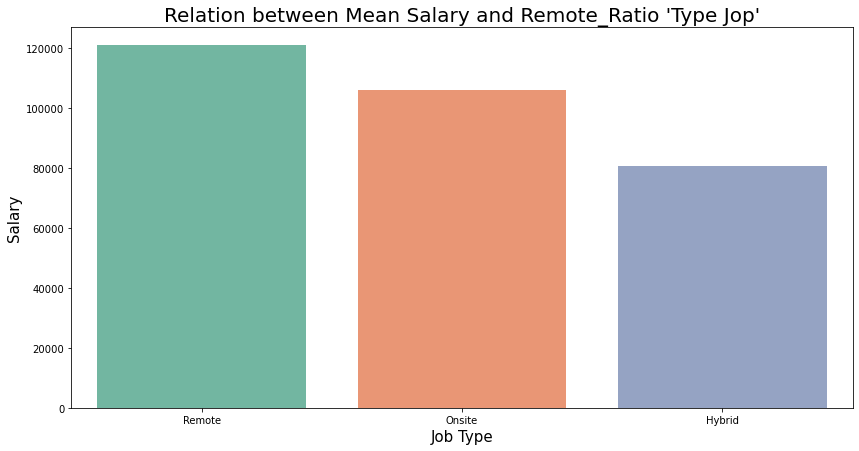

In [44]:
plt.figure(figsize=(14,7))
sns.set_palette("Set2")
sns.barplot(x=MeanSalaryRR.index,y=MeanSalaryRR,order=df['remote_ratio'].value_counts().index)
plt.ylabel("Salary",fontdict={'fontsize':15})
plt.xlabel("Job Type",fontdict={'fontsize':15})
plt.title("Relation between Mean Salary and Remote_Ratio 'Type Jop'",fontdict={'fontsize':20});

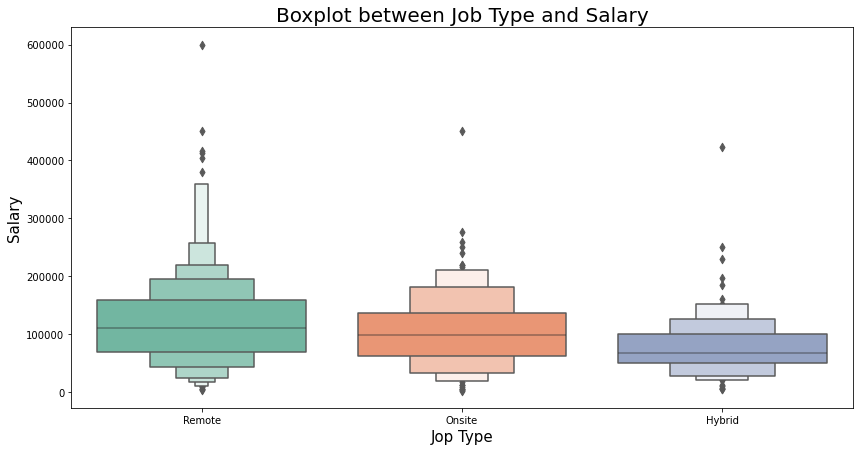

In [45]:
plt.figure(figsize=(14,7))
sns.boxenplot(x=df.remote_ratio,y=df.salary_in_usd,order=df['remote_ratio'].value_counts().index)
plt.xlabel("Jop Type",fontdict={'fontsize':15})
plt.ylabel("Salary",fontdict={'fontsize':15})
plt.title("Boxplot between Job Type and Salary",fontdict={'fontsize':20});

##### This is graph show us in spite of we have big number of employee work Remote but we show Mean salary of type jobs are convergent so we can expect some result from that
- Remote have a high mean beacuse we have many outlayer in data
- So i thing job onsite have a nice mean salary is  105,000$

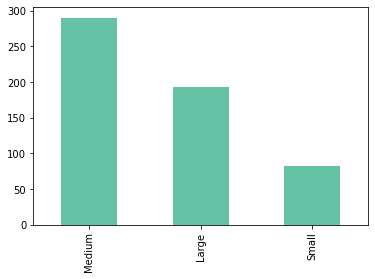

In [46]:
df.company_size.value_counts().plot(kind='bar');

In [47]:
MeanSalaryCS=df.groupby('company_size')['salary_in_usd'].mean().sort_values()

In [48]:
MeanSalaryCS

company_size
Small      77872.097561
Medium    114807.079310
Large     118213.880829
Name: salary_in_usd, dtype: float64

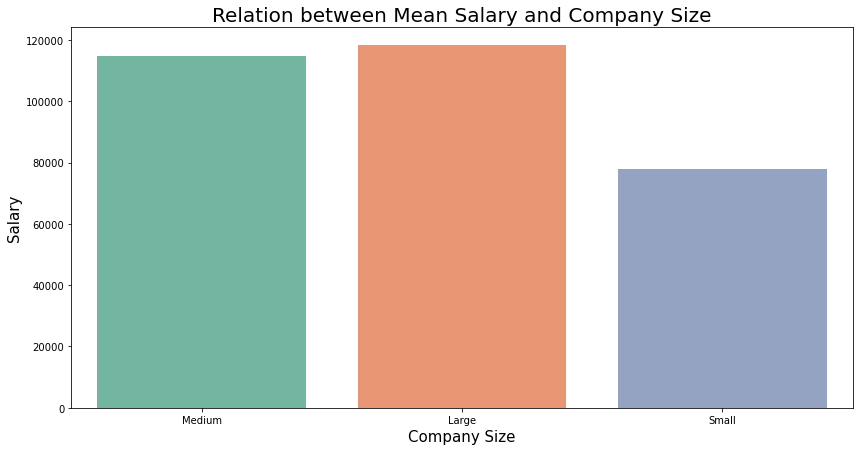

In [49]:
plt.figure(figsize=(14,7))
sns.set_palette("Set2")
sns.barplot(x=MeanSalaryCS.index,y=MeanSalaryCS,order=df['company_size'].value_counts().index)
plt.ylabel("Salary",fontdict={'fontsize':15})
plt.xlabel("Company Size",fontdict={'fontsize':15})
plt.title("Relation between Mean Salary and Company Size",fontdict={'fontsize':20});

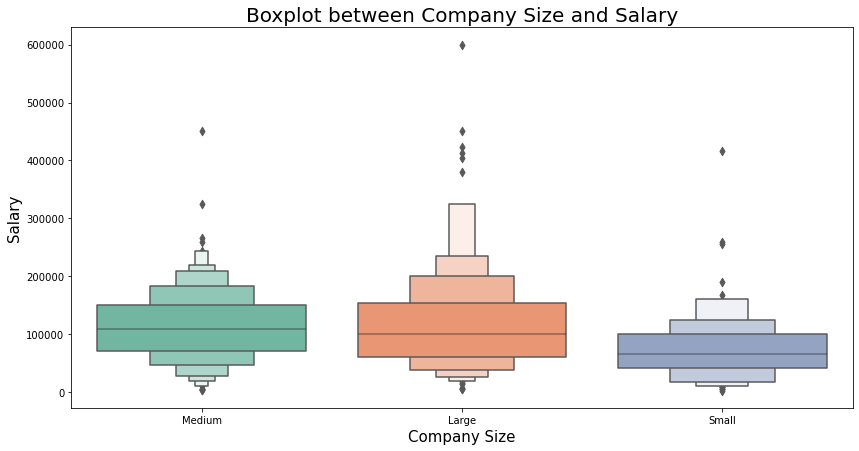

In [50]:
plt.figure(figsize=(14,7))
sns.boxenplot(x=df.company_size,y=df.salary_in_usd,order=df['company_size'].value_counts().index)
plt.xlabel("Company Size",fontdict={'fontsize':15})
plt.ylabel("Salary",fontdict={'fontsize':15})
plt.title("Boxplot between Company Size and Salary",fontdict={'fontsize':20});

##### That is expected result but we have surprice in Mean salary between Medium and large company, In Large company Mean salary is 119,000(USD) annualy ,but in meduim company is 114,000(USD) annualy, I think in this data we didn't have a real large company.

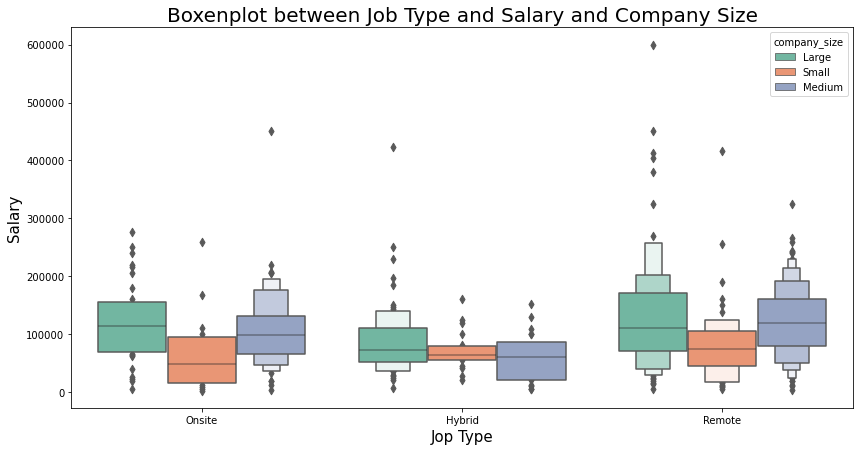

In [51]:
plt.figure(figsize=(14,7))
sns.boxenplot(x=df.remote_ratio,y=df.salary_in_usd,hue=df.company_size)
plt.xlabel("Jop Type",fontdict={'fontsize':15})
plt.ylabel("Salary",fontdict={'fontsize':15})
plt.title("Boxenplot between Job Type and Salary and Company Size",fontdict={'fontsize':20});

#### Prefer work remote in large company and Onsite in Meduium company.

### Top 10 Jobs

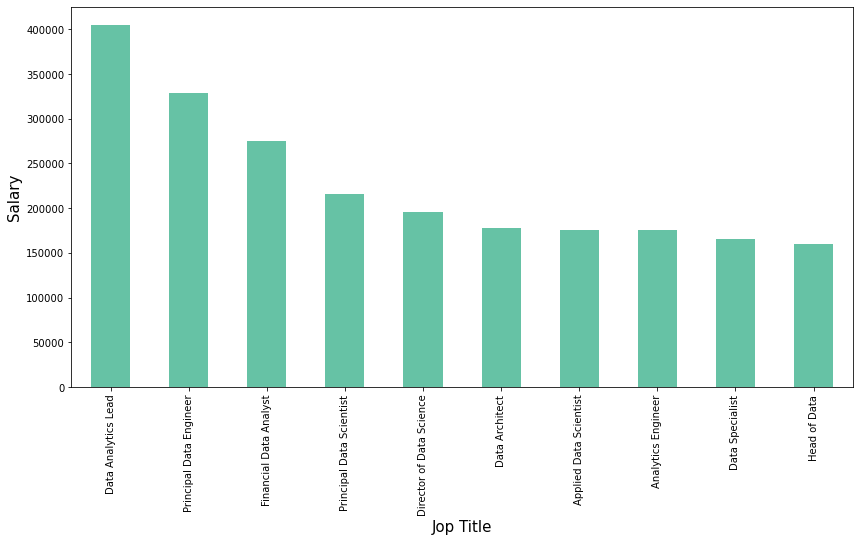

In [52]:
plt.figure(figsize=(14,7))
Top10Jobs =df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel("Jop Title",fontdict={'fontsize':15})
plt.ylabel("Salary",fontdict={'fontsize':15});


### Top 10 Company At The world

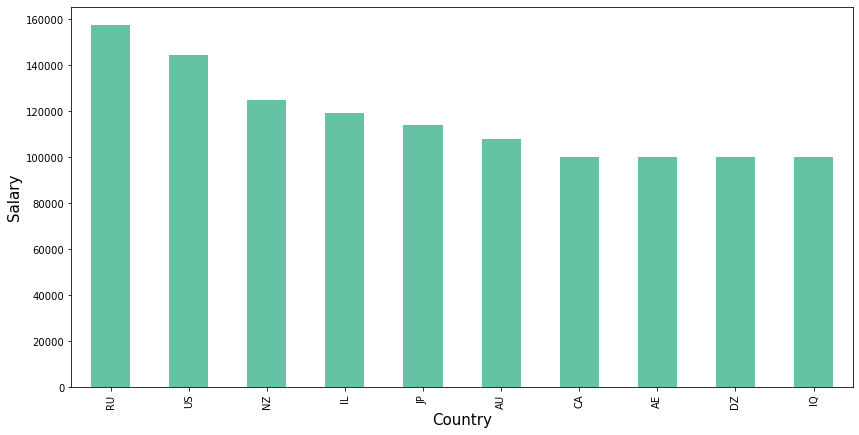

In [53]:
plt.figure(figsize=(14,7))
Top10CompanyLoc =df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel("Country",fontdict={'fontsize':15})
plt.ylabel("Salary",fontdict={'fontsize':15});


## Conclusions

In [54]:
### finally 